<a href="https://colab.research.google.com/github/JosselynChila/ProyectoMineriaU3/blob/main/Experimento1/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga Librerias**

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



# **Carga de Dataset**

In [ ]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Caracterización de dataset**

ph: pH de 1. agua (0 a 14).

Dureza: Capacidad del agua para precipitar jabón en mg/L.

Sólidos: Sólidos disueltos totales en ppm.

Cloraminas: Cantidad de Cloraminas en ppm.

Sulfato: Cantidad de Sulfatos disueltos en mg/L.

Conductividad: Conductividad eléctrica del agua en μS/cm.

Organic_carbon: Cantidad de carbono orgánico en ppm.

Trihalometanos: Cantidad de Trihalometanos en μg/L.

Turbidez: Medida de la propiedad de emisión de luz del agua en NTU.

Potabilidad: Indica si el agua es segura para el consumo humano. Potable - 1 y No potable - 0

# **Identificación X y Y**
En el dataset todas nuestras columnas son importantes ya que como se esta buscando la clasificación de la potabilidad del agua con la no potabilidad de la misma es indispensable seleccionar todas estas columnas (ph, dureza, solidos, cloraminas, sulfato, conductividad, Organic_carbon, Trihalometanos, Turbidez) las cuales serán las variables de entrada o X y para la variable objetivo se toma la columna de potabilidad puesto que esta columna contiene el dato de si el agua es segura o no para el consumo humano.


# **Preprocesamiento de datos**

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### **Limpiar**

In [ ]:
data = data.dropna()

### **Dividir X, Y**

In [ ]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1407, 9), y=(1407,)
Test: X=(604, 9), y=(604,)


### **Normalizar**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Experimento**

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss",
                               mode = 'auto',
                               patience=15)


oculta1=tf.keras.layers.Dense(units=64, input_dim=9, activation="relu")
oculta3=tf.keras.layers.Dropout(0.5)
oculta2=tf.keras.layers.Dense(units=64,activation="relu")
oculta4=tf.keras.layers.Dropout(0.7)
oculta5=tf.keras.layers.Dense(units=64,activation="relu")
oculta6=tf.keras.layers.Dropout(0.3)
oculta7=tf.keras.layers.Dense(units=64,activation="relu")

salida=tf.keras.layers.Dense(units=1,activation="sigmoid")
modelo=tf.keras.Sequential([oculta1,oculta3,oculta2,oculta4,oculta5,oculta6,oculta7,salida])


modelo.compile(
    optimizer="adam",
    loss='mse',
    metrics=["accuracy"]
)

### **Train**

In [ ]:
history = modelo.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/100
141/141 [==============================] - 3s 10ms/step - loss: 0.2465 - accuracy: 0.5771 - val_loss: 0.2420 - val_accuracy: 0.5960
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2470 - accuracy: 0.5807 - val_loss: 0.2413 - val_accuracy: 0.5960
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2421 - accuracy: 0.5949 - val_loss: 0.2400 - val_accuracy: 0.5960
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2434 - accuracy: 0.5970 - val_loss: 0.2388 - val_accuracy: 0.5960
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2415 - accuracy: 0.5984 - val_loss: 0.2384 - val_accuracy: 0.5960
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 0.2399 - accuracy: 0.6077 - val_loss: 0.2363 - val_accuracy: 0.5977
Epoch 7/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2396 - accuracy: 0.5942 - val_loss: 0.2362 - val_accuracy: 0.596

### **Testing**

In [ ]:
y_pred = modelo.predict(X_test)
y_pred = y_pred > 0.5

### **Métricas del modelo**

In [ ]:
accuracyTrain=modelo.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], accuracyTrain[1]*100))

accuracyTest=modelo.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], accuracyTest[1]*100))

44/44 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.7228

accuracy: 72.28%
19/19 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.7103

accuracy: 71.03%


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.7102649006622517
Precision: 0.7057714444488549
Recall: 0.6770491803278689


### **Matriz de Confusion**

Text(0.5, 15.0, 'Predicted label')

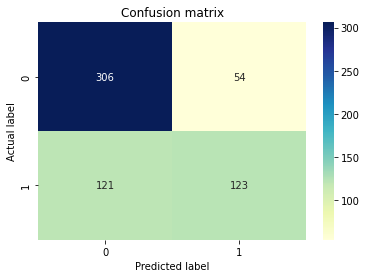

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

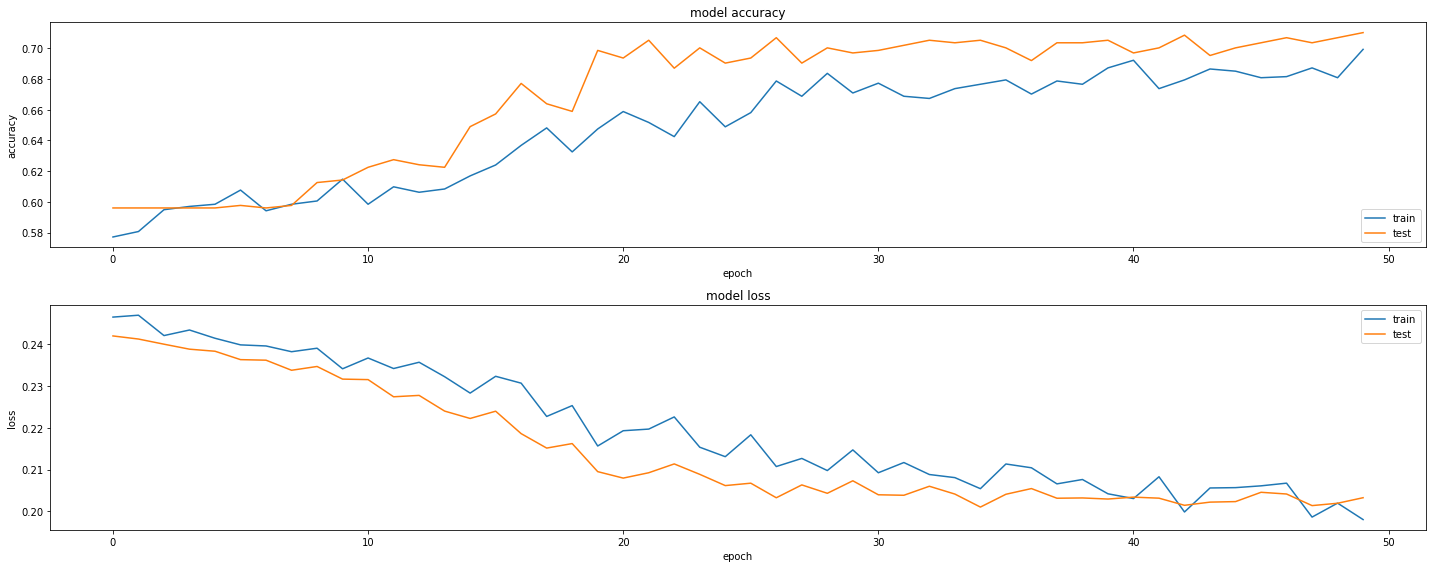

In [ ]:
plt.figure(figsize=[20,8])

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()